In [2]:
%matplotlib inline

import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn import manifold
import time
import os
import community as cm
import networkx as nx
from natsort import natsorted
from sklearn import cluster

In [3]:
nets = [nx.read_graphml('smallworld/time_graphs/0/' + str(2500 + i * 10) + '.graphml') for i in range(10)]

In [4]:
def get_k_means_performance(network, embedding):
    opt = cm.best_partition(network)
    mods = []
    opt = len(set(opt.values()))
    for i in range(1, 1+opt):
        pers = []
        for _ in range(5):
            clusters = cluster.KMeans(int(i)).fit_predict(embedding)
            cluster_dict = dict([(list(network.nodes)[j], clusters[j]) for j in range(len(clusters))])
            pers.append(cm.modularity(cluster_dict,network))
        mods.append(sum(pers) / len(pers))
    
    print(mods.index(max(mods)) + 1, max(mods))
    return max(mods)

In [4]:
d1s = []

for i in tqdm_notebook(range(1, 26)):

    (t1, _, _) = pickle.load(open('walkruns/' + str(i) + '.pkl', 'rb'))
    d1s.append(np.average([t1[t+1] - t1[t] for t in range(len(t1) - 1)]))
    
for i, j in enumerate(d1s):
    print(i, j)


0 2.4583886199527316
1 3.9783065583970814
2 5.559880495071411
3 6.355814615885417
4 7.725650204552545
5 9.010645495520698
6 10.284816318088108
7 11.787532647450766
8 13.118368360731337
9 14.293821016947428
10 15.654305299123129
11 16.915407551659477
12 18.64605866538154
13 19.54142101605733
14 22.036121977700127
15 22.924127181371052
16 26.19438780678643
17 24.034520890977646
18 25.828500668207806
19 27.174390898810493
20 28.307263480292427
21 28.904269138971966
22 30.780626111560398
23 31.980484856499565
24 33.97110388014052


In [5]:
d2s = []
for f in natsorted(os.listdir('DynamicGEM-master/dynruns/')):

    (t1, _) = pickle.load(open('DynamicGEM-master/dynruns/' + f, 'rb'))
    d2s.append(np.average([t1[t+1] - t1[t] for t in range(len(t1) - 1)]))
    
for i, j in enumerate(d2s):
    print(i, j)

0 2.5302544699774847
1 3.255141258239746
2 3.027993361155192
3 2.9672957261403403
4 3.2157981395721436
5 3.396519581476847
6 4.138271729151408
7 4.09453288714091
8 3.8764903280470104
9 4.174983607398139
10 4.513772434658474
11 4.415762662887573
12 5.358465883466932
13 4.8273411591847735
14 4.550663524203831
15 4.685672018263075
16 4.745168341530694
17 5.700754642486572
18 5.332456986109416
19 5.945505963431464
20 6.1362504959106445
21 7.273103316624959
22 6.6153375837537975
23 7.4271425935957165
24 9.081350829866198
25 8.639280080795288
26 9.275001287460327
27 10.25032795800103
28 10.068936612870958
29 10.58851793077257
30 13.830397764841715
31 13.053046623865763
32 13.609991020626492
33 13.049286365509033
34 14.364685508939955
35 15.419933372073704
36 15.7350238694085
37 16.205069330003525
38 18.09133900536431
39 18.071093850665623
40 20.629869010713364
41 19.04894389046563
42 21.72025267283122
43 22.67983733283149
44 20.451374663247
45 25.10561164220174
46 29.23788497183058
47 33.546

In [6]:
comps = []
for d in d1s:
    dists = [np.abs(a - d) for a in d2s]
    closest = dists.index(min(dists))
#     comps.append(closest)
    comps.append(natsorted(os.listdir('DynamicGEM-master/dynruns/'))[closest])
    
for i, j in enumerate(comps):
    print(i, j)

0 1.pkl
1 9.pkl
2 18.pkl
3 25.pkl
4 35.pkl
5 36.pkl
6 46.pkl
7 51.pkl
8 60.pkl
9 75.pkl
10 85.pkl
11 90.pkl
12 110.pkl
13 110.pkl
14 115.pkl
15 120.pkl
16 150.pkl
17 150.pkl
18 150.pkl
19 175.pkl
20 175.pkl
21 175.pkl
22 175.pkl
23 200.pkl
24 200.pkl


In [7]:
# train_times_dyngem = []
# perf_by_network_dyngem = []

# # for i in tqdm_notebook(range(1, 3)):
# for i in tqdm_notebook(range(10,11)):
#     t1 = []
#     t2 = []
#     (times, all_embeds) = pickle.load(open('DynamicGEM-master/dynruns/' + str(i) + '.pkl', 'rb'))
#     for j in tqdm_notebook(range(10)):
#         t1.append(times[j])
#         t2.append(get_k_means_performance(nets[j], all_embeds[j]))
#     train_times_dyngem.append(t1)
#     perf_by_network_dyngem.append(t2)

In [8]:
# train_times_walk = []
# perf_by_network_walk = []

# for i in tqdm_notebook(range(2, 3)):
#     t1 = []
#     t2 = []
#     (times, all_embeds, total_losses) = pickle.load(open('walkruns/' + str(i) + '.pkl', 'rb'))
#     for j in tqdm_notebook(range(10)):
#         t1.append(times[j])
#         t2.append(get_k_means_performance(nets[j], all_embeds[j]))
#     train_times_walk.append(t1)
#     perf_by_network_walk.append(t2)

6 0.12670536197172216
5 0.4750046029195153
4 0.5615893230251254
10 0.6326123755759279
9 0.6537218276529517
12 0.6781274136589157
7 0.6788889693505278
10 0.690527192905367
8 0.6950249901852011
9 0.6947923560617529


6 0.18403001139612143
10 0.24996274905400018
7 0.22767814521005034
8 0.21870226664445905
5 0.21270123878143052
7 0.24194841301463907
8 0.21848786487825347
8 0.269669287176518
7 0.19803069225271192
9 0.2469721408123216


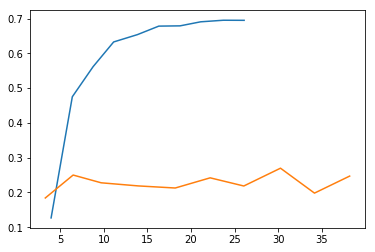

4 0.3610288124579199
8 0.6280976485293304
9 0.6594543426852035
8 0.6792331535983898
9 0.6938951034724787
12 0.691962376434403
13 0.6997724896506298
12 0.7017653960877162
11 0.7088523898330474
11 0.7119079606431846


8 0.5561127760731118
6 0.5619316280364867
6 0.5650706578782547
7 0.5851902272620588
9 0.591638869926268
7 0.5511924703670854
9 0.533839644241642
10 0.5463659611149596
7 0.5219337051986086
8 0.5697331232644484


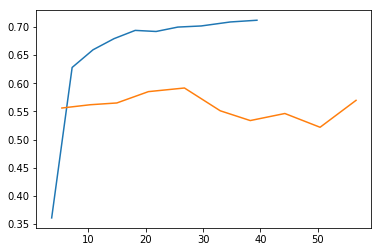

13 0.5736874675776205
14 0.6397133232216878
7 0.6746327268279763
15 0.6784031598725883
7 0.6927966101723138
8 0.7079520648396243
7 0.7011840103363204
8 0.7039436310366932
8 0.7035234173309919
8 0.7045935212011257


12 0.6441388643613205
13 0.6624603008453965
11 0.6509122344779137
11 0.6548957400492491
13 0.5947534685033489
12 0.6611695177522698
12 0.6567986270878284
9 0.6427358284395323
11 0.66595245805218
12 0.6660223554480454


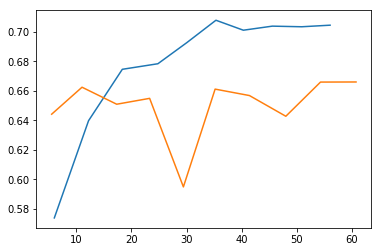

13 0.6820229909162151
14 0.7163915259211826
12 0.7190722564286671
12 0.7220554993673977
11 0.7176749196789958
14 0.7106845823659321
11 0.7216559919040559
12 0.7200736041035556
12 0.7169869760514807
15 0.7163412251262957


14 0.6641126339665125
13 0.6638309761158556
12 0.6633558296935324
19 0.6643304127291135
18 0.6636001773565194
11 0.683031517418083
17 0.6607587554763672
12 0.6521657848347308
15 0.6646940375493854
13 0.651823495894608


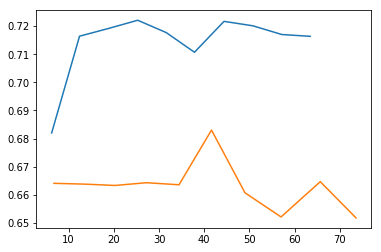

12 0.6977212620445691
11 0.7283378397885721
10 0.7248874746131657
14 0.7228116750095553
9 0.7250865027323325
11 0.7246148331454898
14 0.7272175494011094
8 0.7220722807094633
16 0.7270462061457404
11 0.7225618269525712


15 0.6382698528437876
18 0.6557598320016474
15 0.6427454027162068
12 0.6664794459073073
11 0.6566774723577472
15 0.6561579123728991
11 0.6611637585797615
15 0.6473960230973625
10 0.6490096652571703
11 0.6763207251502564


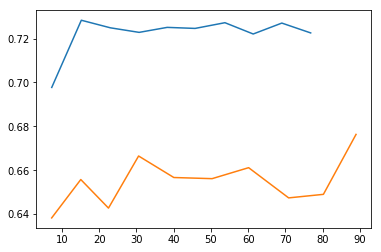

10 0.713277224451165
10 0.715049352765754
10 0.722270349860229
9 0.7159264851774371
9 0.7140155697091961
9 0.7198857976029025
9 0.7312508867692902
11 0.7159827919996692
9 0.7278863736960723
9 0.7240332199168987


12 0.6469711903014315
15 0.6242410142842385
19 0.6376277429062118
13 0.6565769565815722
16 0.6537771468269149
14 0.6403979859330848
10 0.6492649940410999
9 0.6498687209861354
12 0.6652850568520112
9 0.654212358585414


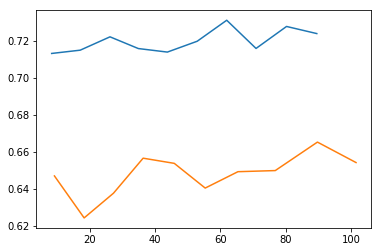

9 0.7148506197503339
10 0.7203227619432694
9 0.7311248274601262
9 0.7292634854089083
8 0.728839363246961
10 0.7258699569192929
8 0.7306995291085535
8 0.7286684826718085
12 0.7284667521828123
8 0.7305883700248781


9 0.622267283887595


In [ ]:
train_times_walk = []
perf_by_network_walk = []

train_times_dyngem = []
perf_by_network_dyngem = []

for i in tqdm_notebook(range(1, 24)):
    t1 = []
    t2 = []
    (times, all_embeds, total_losses) = pickle.load(open('walkruns/' + str(i) + '.pkl', 'rb'))
    for j in tqdm_notebook(range(10)):
        t1.append(times[j])
        t2.append(get_k_means_performance(nets[j], all_embeds[j]))
    train_times_walk.append(t1)
    perf_by_network_walk.append(t2)
    
    t1 = []
    t2 = []
#     (times, all_embeds) = pickle.load(open('DynamicGEM-master/dynruns/' + str(comps[i]) + '.pkl', 'rb'))
    (times, all_embeds) = pickle.load(open('DynamicGEM-master/dynruns/' + comps[i], 'rb'))
    for j in tqdm_notebook(range(10)):
        t1.append(times[j])
        t2.append(get_k_means_performance(nets[j], all_embeds[j]))
    train_times_dyngem.append(t1)
    perf_by_network_dyngem.append(t2)
    
    plt.plot(train_times_walk[-1], perf_by_network_walk[-1])
    plt.plot(train_times_dyngem[-1], perf_by_network_dyngem[-1])
    plt.show()

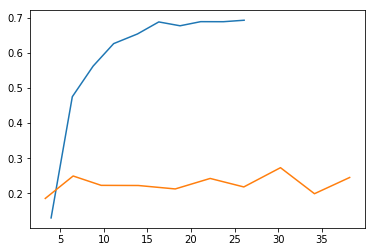

In [11]:
plt.plot(train_times_walk[0], perf_by_network_walk[0])
plt.plot(train_times_dyngem[0], perf_by_network_dyngem[0])
plt.show()

In [ ]:
for i in tqdm_notebook(range(10)):
    opt = cm.best_partition(nets[i])
    print(cm.modularity(opt, nets[i]))

In [10]:
pickle.dump([train_times_walk,
perf_by_network_walk,
train_times_dyngem,
perf_by_network_dyngem], open('cluster_perfs.pkl', 'wb'))

In [7]:
embs = pickle.load(open('hepth/runs_node2vec.pkl', 'rb'))
mods = []
for i in range(len(nets)):
    mods.append(get_k_means_performance(nets[i], embs[i]))
                
print(np.average(mods), mods)

13 0.6846571188507853
10 0.6851083068056573
12 0.6772409533034353
13 0.6735818420274226
14 0.6810616898708158
9 0.6789158095160992
15 0.6751205050303198
13 0.6796989620919965
15 0.6755148104264797
10 0.6780570074465239
0.6788957005369536 [0.6846571188507853, 0.6851083068056573, 0.6772409533034353, 0.6735818420274226, 0.6810616898708158, 0.6789158095160992, 0.6751205050303198, 0.6796989620919965, 0.6755148104264797, 0.6780570074465239]


In [10]:
(times, embs, total_losses) = pickle.load(open('walkruns/' + str(7) + '.pkl', 'rb'))
times
# mods = []
# for i in range(len(nets)):
#     mods.append(get_k_means_performance(nets[i], embs[i]))
                
# print(np.average(mods), mods)

[10.207536697387695,
 20.707631587982178,
 31.25481343269348,
 41.461472511291504,
 51.59044885635376,
 61.57936477661133,
 71.72499060630798,
 82.06740498542786,
 92.35958170890808,
 102.77088356018066]

In [ ]:
(times, embs) = pickle.load(open('DynamicGEM-master/dynruns/35.pkl', 'rb'))
mods = []
for i in range(len(nets)):
    mods.append(get_k_means_performance(nets[i], embs[i]))
                
print(np.average(mods), mods)

print('--------------')
print(times)

17 0.6607804280581892
8 0.6597485682580535
11 0.664967389548583
12 0.6636353917864617
16 0.6589279451274078
11 0.6765866161120281
18 0.6557506230662368
12 0.6559537497027532


In [16]:

mods = []
for i in range(len(nets)):
    mods.append(cm.modularity(cm.best_partition(nets[i]), nets[i]))
#     mods.append(get_k_means_performance(nets[i], embs[i]) / nx.average_clustering(nets[i]))
                
print(np.average(mods), mods)

0.7557033285118251 [0.7498792783744112, 0.7568937921475342, 0.7548671246835827, 0.7595030778309527, 0.7539805523936635, 0.7597478858620202, 0.7574610701786219, 0.7494169020946847, 0.7583876415456006, 0.7568959600071801]


In [9]:
# nets = [nx.read_graphml("hepth/graphs/" + str(5*m) + ".graphml") for m in range(10)]
nets = [nx.read_graphml("hepth/graphs/" + str(5*m) + ".graphml") for m in range(10)]
singletons = [list(nx.isolates(n)) for n in nets]
for i in range(len(nets)):
    nets[i].remove_nodes_from(singletons[i])

In [10]:
mods = []
for i in range(len(nets)):
    mods.append(cm.modularity(cm.best_partition(nets[i]), nets[i]))
#     mods.append(get_k_means_performance(nets[i], embs[i]) / nx.average_clustering(nets[i]))
                
print(np.average(mods), mods)

0.6501152427216359 [0.6531019632945606, 0.6487581959364102, 0.6538479544234768, 0.6556780734401738, 0.6570004638991213, 0.6571158234906984, 0.645644810401375, 0.643548808831448, 0.644521522492502, 0.6419348110065939]


In [11]:
embs = pickle.load(open('hepth/AS_node2vec.pkl', 'rb'))
mods = []
for i in range(len(nets)):
    singles = [int(x) for x in singletons[i]]
    keeps = [x for x in range(embs[i].shape[0]) if x not in singles]
    embs[i] = embs[i][keeps]
    mods.append(get_k_means_performance(nets[i], embs[i]))
                
print(np.average(mods), mods)

26 0.4902197228006656
7 0.27410545212142934
7 0.276225513638794
8 0.2892483766482567
9 0.28996064310453395
5 0.2941698951704293
4 0.23578226115965012
4 0.23528394126566213
5 0.24143876682193097
5 0.23590512689069673
0.28623396996220485 [0.4902197228006656, 0.27410545212142934, 0.276225513638794, 0.2892483766482567, 0.28996064310453395, 0.2941698951704293, 0.23578226115965012, 0.23528394126566213, 0.24143876682193097, 0.23590512689069673]


In [12]:
(times, embs, total_losses) = pickle.load(open('walk_AS/' + str(15) + '.pkl', 'rb'))
mods = []
for i in range(len(nets)):
    singles = [int(x) for x in singletons[i]]
    keeps = [x for x in range(embs[i].shape[0]) if x not in singles]
    embs[i] = embs[i][keeps]
    mods.append(get_k_means_performance(nets[i], embs[i]))
                
print(np.average(mods), mods)

8 0.2844712708757456
2 0.20601452068824075
8 0.20570300708626776
9 0.12179293284766765
6 0.2088171491559186
4 0.19277464667735905
5 0.11674610415452084
2 0.13277123017215994
2 0.13448898181184699
5 0.12072388251644481
0.1724303725986172 [0.2844712708757456, 0.20601452068824075, 0.20570300708626776, 0.12179293284766765, 0.2088171491559186, 0.19277464667735905, 0.11674610415452084, 0.13277123017215994, 0.13448898181184699, 0.12072388251644481]


In [11]:
0.6641126339665125+ 0.6638309761158556+ 0.6633558296935324+ 0.6643304127291135+ 0.6636001773565194+ 0.683031517418083+ 0.6607587554763672+ 0.6521657848347308+ 0.6646940375493854+ 0.651823495894608


6.631703621034708